# Assignment 9: Causal Inference (Part 2)

## Objective:

Causal inference is the process of drawing a conclusion about a causal connection based on the conditions of the occurrence of an effect. It is a very powerful and widely-used tool in real-world applications and scenarios. In this assignment, you are expected to apply the basic concepts of causal inference to solve problems on real datasets and be able to achieve the following goals.

* Understand why causality is needed.
* Understand what is causality, particularly the difference between causality and correlation.
* Understand how to estimate counterfactual results.
* Understand how to use the graphical model to represent causality.
* Can use some tools (e.g., dowhy) to infer causality, express causality and estimate treatment effects.

# 0. Preparation

In [1]:
import numpy as np
import pandas as pd
from dataprep.eda import plot
pd.options.mode.chained_assignment = None

In this assignment, you are going to use the [Lalonde](lalonde.csv) dataset. Each tuple in the dataset represents an individual who was enrolled (or not enrolled) in a job training program. It aims to evaluate the effectiveness of a job training program (the treatment variable) on the real earnings of an individual, after completing the program for years. 

The dataset consists of a number of demographic variables, like age, race, academic background, marriage status, and previous real earnings in 1974, 1975 as well as a treatment indicator, and the real earnings in the year 1978 (the outcome variable).

In [2]:
lalonde = pd.read_csv('lalonde.csv', index_col=0)
lalonde.head()
lalonde.head(-5)

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899
...,...,...,...,...,...,...,...,...,...,...
PSID420,0,39,2,1,0,1,1,0.0,0.0,964.9555
PSID421,0,55,8,0,0,1,1,0.0,0.0,0.0000
PSID422,0,16,9,0,0,0,1,0.0,0.0,5551.8190


In [3]:
plot(lalonde);

## Task 1. Causal Graph 
In this task, you will draw a causal graph on a real-world dataset based on the information given. Please remind yourself of the difference between causality and correlation.

In [4]:
#import graphviz, the python tool we are going to use for this task
from graphviz import Digraph

In the Lalonde dataset, `treat` is the treatment attribute, which represents whether an individual was enrolled in the job training program or not. `re78` is the outcome attribute. `age` and `married` are confounding variables. Please draw the causal graph for these four attributes using Graphviz.

In [5]:
dot = Digraph(comment='The causal graph for Lalonde')
dot.node('a','treat')
dot.node('b','age')
dot.node('c','married')
dot.node('d','re78')

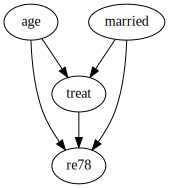

In [6]:
#<-- Write Your Code -->

#Implement your plot function here and show the graph, the output should be a causal graph
dot.edges(['ca', 'cd'])
dot.edges(['ba','bd'])
dot.edge('a','d')
dot

## Task 2. ATE Estimation
In this task, your job is to implement different AET estimation approaches and draw useful conclusions.

### 2.1 Perfect Matching
For the PSID tuples in the dataset (i.e., those individuals who weren't enrolled in the job training program), please use perfect matching to estimate their salaries if they received treatments?


In [7]:
#<-- Write Your Code -->

# Implement the perfect matching method here and output the count of PSID tuples whose counterfactual can be computed
# using perfect matching, as well as the percentage of such tuples among all PSID tuples. If there are multiple 
# tuples in the treatment group that can be matched with the control group, just select the first one
# output: count and percentage
lalonde_psid = lalonde[lalonde['treat']==0].reset_index()
lalonde_nsw = lalonde[lalonde['treat']==1].reset_index()
lllon = lalonde_nsw.merge(lalonde_psid,on=['age', 'educ', 'black', 'hispan', 'married', 'nodegree','re74', 're75'])
llo = lllon.drop_duplicates(subset=['id_y'],keep='first')
count = len(llo)
total_count = len(lalonde_psid)

percentage = str((count/total_count)*100) + '%'

In [8]:
# Run the following code to print out the result
print("Count of tuples which can be computed by perfect matching is " + str(count))
print("Percentage of such tuples among all PSID tuples is " + str(percentage))

Count of tuples which can be computed by perfect matching is 12
Percentage of such tuples among all PSID tuples is 2.797202797202797%


In [9]:
#<-- Write Your Code -->

# Compute ATE among those PSID tuples whose counterfactual can be computed using perfect matching
# output: value of ATE
llo['individual_ATE'] = (llo['re78_x'] - llo['re78_y'])
ATE = llo['individual_ATE'].mean()

In [10]:
# Run following code to print the result
print("ATE by perfect matching is " + str(ATE))

ATE by perfect matching is 1362.3939999999996


### 2.2 Nearest Neighbor Matching
For the PSID tuples in the dataset (i.e., those who weren't enrolled in the job training program), please use the nearest neighbor matching to estimate their salaries if they received treatments?

Please use all covariates (the attributes besides treatment and outcome) and use Euclidean distance as the distance metric.

In [11]:
#<-- Write Your Code -->

# Implement the nearest neighbor matching method here and output the count of PSID tuples whose counterfactual can be
# computed using nearest neighbor matching, when the threshold is set to 1000, as well as the percentage of such tuples among all PSID tuples
# Output: count and percentage

# Please use np.linalg.norm(x1 - x2) to compute the euclidean distance between two vectors
lalonde_psid = lalonde[lalonde['treat']==0].reset_index()
psid_cols = lalonde_psid.columns.tolist()
psid_cols = [entry + '_x' for entry in psid_cols]
lalonde_nsw = lalonde[lalonde['treat']==1].reset_index()
nsw_cols = lalonde_nsw.columns.tolist()
nsw_cols = [entry + '_y' for entry in nsw_cols]
lalonde_psid['_tmpkey'] = 1
lalonde_nsw['_tmpkey'] = 1

result = pd.merge(lalonde_nsw, lalonde_psid, on='_tmpkey').drop(['_tmpkey'], axis=1)
result['vectorY'] = result[psid_cols[2:10]].values.tolist()
result['vectorX'] = result[nsw_cols[2:10]].values.tolist()

#Creating a dictionary to store norm values
dict_eu = {}
itera = 0
for a,b in zip(result['vectorY'],result['vectorX']):
    a = np.array(a)
    b = np.array(b)
    eu_dist = np.linalg.norm(a-b)
    dict_eu[itera] = eu_dist
    itera += 1

df_eu_dist = pd.DataFrame.from_dict(dict_eu,orient='index',columns=['eu_dist'])

#Concatenating calculated norms to universal dataframe 
nearest_neighbours = pd.concat([result,df_eu_dist],axis=1)
nearest_neighbours = nearest_neighbours[nearest_neighbours['eu_dist']<1000]
nearest_neighbours = nearest_neighbours.sort_values('eu_dist').groupby("id_y").first()
count = len(nearest_neighbours)
percentage = str((count/total_count)*100) + '%'

In [12]:
#run following code to print the result
print("Count of tuples which can be computed by nearest neighbor matching is " + str(count))
print("Percentage of such tuples among all PSID tuples is " + str(percentage))

Count of tuples which can be computed by nearest neighbor matching is 318
Percentage of such tuples among all PSID tuples is 74.12587412587412%


In [13]:
#<-- Write Your Code -->

# Compute ATE among those PSID tuples whose counterfactual can be computed using nearest neighbor matching
# Output: value of ATE
nearest_neighbours['individual_ATE'] = (nearest_neighbours['re78_x'] - nearest_neighbours['re78_y'])
nearest_neighbours
ATE = nearest_neighbours['individual_ATE'].mean()


In [14]:
# Run following code to print out the result
print("ATE by nearest neighbor matching is " + str(ATE))

ATE by nearest neighbor matching is 116.59037437106929


### 2.3 Propensity Score Matching
For the PSID tuples in the dataset (i.e., those weren't enrolled in the job training program), please use propensity score matching to estimate their salaries if they received treatments?

Please use logistic regression to fit the propensity score.

In [15]:
#<-- Write Your Code -->
from sklearn.linear_model import LogisticRegression

# Compute propensity score P(y = 1|X) for each tuple in the dataset. Use logistic regression.
# Output: add the new column "psm" to lalonde dataframe
label = lalonde['treat']
features = lalonde.iloc[:,1:10]
clf = LogisticRegression(solver='liblinear').fit(features, label)
predict_probs = clf.predict_proba(features)[:,1]
lalonde['psm'] = predict_probs.tolist()

In [16]:
# Run the following code to see the result
lalonde.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,psm
id,,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0.458074
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0.151980
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0.750966
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0.674020
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0.670590


In [17]:
#<-- Write Your Code -->

# For each tuple in the control group, find the matching tuple in the treatment group, and then compute
# the ATE over the population
# Please match tuples with the metric |psm1 - psm2| to be minimum, threhold set to 0.01
# Output: the value of ATE, the count of tuples that can be matched, as well as the percentage
lalonde_psid = lalonde[lalonde['treat']==0].reset_index()
psid_cols = lalonde_psid.columns.tolist()
psid_cols = [entry + '_x' for entry in psid_cols]
lalonde_nsw = lalonde[lalonde['treat']==1].reset_index()
nsw_cols = lalonde_nsw.columns.tolist()
nsw_cols = [entry + '_y' for entry in nsw_cols]
lalonde_psid['_tmpkey'] = 1
lalonde_nsw['_tmpkey'] = 1

result_prop = pd.merge(lalonde_nsw, lalonde_psid, on='_tmpkey').drop(['_tmpkey'], axis=1)
result_prop['psm_diff'] = abs(result_prop['psm_x'] - result_prop['psm_y'])
result_prop = result_prop[result_prop['psm_diff']<=0.01]
result_prop = result_prop.sort_values('psm_diff').groupby("id_y").first()
result_prop['individual_ATE'] = (result_prop['re78_x'] - result_prop['re78_y'])
ATE = result_prop['individual_ATE'].mean()
count = len(result_prop)
percentage = str((count/total_count)*100) + '%'

In [18]:
# Run the following code to print out the result
print("ATE by propensity score matching is " + str(ATE))
print("Count of tuples which can be computed by propensity score matching is " + str(count))
print("Percentage of such tuples among all PSID tuples is " + str(percentage))

ATE by propensity score matching is -483.69047666666654
Count of tuples which can be computed by propensity score matching is 375
Percentage of such tuples among all PSID tuples is 87.41258741258741%


### 2.4 Linear Regression
Train two individual models to fit P(y|t = 1,X) and P(y|t = 0,X), then infer the counterfactual outcome using two models while setting treatment to the opposite value. Infer the ATE over the population.

In [19]:
#<-- Write Your Code -->

# Train two individual linear regression models and infer the counterfactual result for each tuple
# Output: the value of ATE, over the population
from sklearn.linear_model import LinearRegression

lalonde_psid = lalonde[lalonde['treat']==0].reset_index()
lalonde_nsw = lalonde[lalonde['treat']==1].reset_index()

Y_psid = lalonde_psid['re78']
Y_nsw = lalonde_nsw['re78']

X_psid =  lalonde_psid.iloc[:,1:10]
X_nsw = lalonde_nsw.iloc[:,1:10]

model_psid = LinearRegression().fit(X_psid, Y_psid)
model_nsw = LinearRegression().fit(X_nsw,Y_nsw)

predict_nsw = model_psid.predict(X_nsw)
predict_psid = model_nsw.predict(X_psid)

lalonde_nsw['predict_nsw'] = predict_nsw
lalonde_psid['predict_psid'] = predict_psid

lalonde_nsw['nsw_diff'] = lalonde_nsw['predict_nsw'] - lalonde_nsw['re78']
lalonde_psid['psid_diff'] = lalonde_psid['predict_psid'] - lalonde_psid['re78']

nsw_ATE = lalonde_nsw['nsw_diff'].sum()
psid_ATE = lalonde_psid['psid_diff'].sum()

ATE = (nsw_ATE+psid_ATE)/len(lalonde)

In [20]:
# Run following code to print out the result
print("ATE by linear regression is " + str(ATE))

ATE by linear regression is 82.06521337779454


Please briefly discuss the advantages and disadvantages of the above four approaches.

**A.** Perfect Matching - It searches for the specific match of the considerable number of qualities among treatment and control, which is frequently hard to get thus despite the fact that the surmising may be exact yet the check is less. 

Nearest Neighbor - This follows an greedy method to deal with the match between the treatment and control factors. chooses the nearest unequaled choice to coordinate each time, or a progressively entangled, increasingly advanced "optimal matching" whichwhich, through some involved calculations, minimizes global balance over all matches. Since the nearest neighbor calculation just gives the 'nearest' neighbor, one can wind up with an awful match if the nearest neighbor is far away. 

Propensity score Matching - PSM improves model dependence, bias, inefficiency. One flaw of PSM is that it just records for observed (and observable) covariates.

Linear Regression - Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. The disadvantage of this is that it fails to track the non linearity in the data.

## Task 3. DoWhy
In this task, you are required to apply DoWhy and analyze the dataset using two ATE estimation methods.

In [21]:
from dowhy.causal_model import CausalModel
lalonde['treat'] = lalonde['treat'].astype(bool)
model=CausalModel(
        data = lalonde,
        treatment='treat',
        outcome='re78',
        common_causes='nodegree+black+hisp+age+educ+married'.split('+'))


Causal Graph not provided. DoWhy will construct a graph based on data inputs.
Model to find the causal effect of treatment ['treat'] on outcome ['re78']


In [22]:
#<-- Write Your Code -->

# Use the linear regression and PSM methods provided by DoWhy to estimate ATE 
# Output: ATE_linear, ATE_psm
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

# Estimate the target estimand using a statistical method.
ATE_psm = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

# Estimate the target estimand using a statistical method.
ATE_linear = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression")

Common causes of treatment and outcome:['educ', 'hisp', 'age', 'nodegree', 'married', 'black']
If this is observed data (not from a randomized experiment), there might always be missing confounders. Causal effect cannot be identified perfectly.


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


Instrumental variables for treatment and outcome:[]
INFO: Using Propensity Score Matching Estimator
b: re78~treat+educ+age+nodegree+married+black
/home/jedixnavi/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jedixnavi/.local/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:62: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/home/jedixnavi/.local/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:77: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()
INFO: Using Linear Regression Estimat

In [23]:
# Run following code to print out the result
print("ATE by linear regression is " + str(ATE_linear.value))
print("ATE by psm is " + str(ATE_psm.value))

ATE by linear regression is 1203.0914513083053
ATE by psm is 73.62268737785037


Briefly explain why the result by DoWhy is not same as the result by your own implementation.

**A.** Provides a principled method for displaying a given issue as a causal graph so all preassumptions are given. Gives a unified interface to numerous well known causal deduction techniques, consolidating the two significant systems of graphical models and potential results. Automatically tests for the validity of assumptions if possible and assesses the robustness of the estimate to violations.

## Submission

Complete the code in this notebook, and submit it to the CourSys activity Assignment 9.